In [2]:
from theano import function
import theano.tensor as T
import numpy as np

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)


In [2]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x - y

In [1]:
'hola' in 'HOLAhola'

True

In [3]:
my_first_func = function([x, y], z)
my_first_func(100., 9.)

array(91.0)

In [9]:
type(x), x.type is T.dscalar

(theano.tensor.var.TensorVariable, True)

In [10]:
from theano import pp
pp(z)

'(x - y)'

### Ahora con matrices

In [4]:
x = T.dmatrix('x')
y = T.dmatrix('y')
z = x - y

In [5]:
my_first_func = function([x, y], z)

In [6]:
my_first_func(np.array([[101, 22], [33, 455]]), np.array([[10, 20], [30, 40]]))

array([[  91.,    2.],
       [   3.,  415.]])

In [7]:
q = T.dscalar('q')
z = x - y*q

In [8]:
my_second_func = function([x, y, q], z)
my_second_func(np.array([[101, 22], [33, 455]]), np.array([[10, 20], [30, 40]]), 2.)

array([[  81.,  -18.],
       [ -27.,  375.]])

### Función Logística con Theano

In [27]:
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))


In [30]:
logistic = function([x], s)
logistic(np.array([[0, 1], [-1, -2]]))

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

### Calculando cosas al mismo tiempo

In [33]:
x, y = T.dmatrices('x', 'y')
diff = x - y
summ = x + y
my_sim_func = function([x, y], [diff, summ])
my_sim_func(np.array([[101, 22], [33, 455]]), np.array([[10, 20], [30, 40]]))

[array([[  91.,    2.],
        [   3.,  415.]]), array([[ 111.,   42.],
        [  63.,  495.]])]

### CNN en Theano

In [9]:
from theano.tensor.nnet import conv2d, sigmoid
from theano import shared

In [59]:
rng = np.random.RandomState(23465)

# instantiate 4D tensor for input
input_l = T.tensor4(name='input')

# initialize shared variable for weights.
w_shp = (2, 1, 4, 4)
w_bound = np.sqrt(1 * 4 * 4)
W = shared( np.asarray(
            rng.uniform(
                low=-1.0 / w_bound,
                high=1.0 / w_bound,
                size=w_shp),
            dtype=input_l.dtype), name ='W')

b_shp = (2,)
b = shared(np.zeros(b_shp, dtype=input_l.dtype), name ='b')

conv_out = conv2d(input_l, W)
output = sigmoid(conv_out + b.dimshuffle('x', 0, 'x', 'x'))

In [60]:
f = function([input_l], output)

In [51]:
import cv2
import matplotlib.pyplot as plt

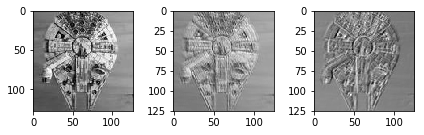

In [61]:
# open random image of dimensions 128x128
img = cv2.imread('../star_wars_hackathon/data/all/falcon_#1.jpg', 0)
img = img / 255.
img = img.astype(np.float32)

img_ = img.reshape(1, 1, 128, 128)

filtered_img = f(img_)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(filtered_img[0, 0, :, :], cmap='gray')
pylab.subplot(1, 3, 3)
plt.imshow(filtered_img[0, 1, :, :], cmap='gray')
plt.tight_layout()
plt.show()